# **EDA**
### **Predicción de satisfacción de los clientes en una clínica**


# **1. Importe de librerías**

In [2]:
# Importar paquetes necesarios. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import seaborn as sns

#Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Imputación y pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Para "Encodear" o codificar la variable a predecir
from sklearn.preprocessing import LabelEncoder

# to display complete dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

# **2. Carga de datos**

In [3]:
# Cargar el dataset
data_df = pd.read_csv("../dataset/dataset.csv")

# **3. Exploración de datos** 

In [4]:
data_df.head()

,Patient ID,Gender,Patient Type,Age,Ensurance,Class,Clinic Distance,Wifi,Time convenience,Online booking,Clinic location,Food and drink,Waiting room,Comfort of the facilities,Inflight entertainment,Pre-entry service,Post-entry service,Visitor service,Check-in service,Medic service,Cleanliness,Waiting time (min),Delay in care (min),Satisfaction
0,19556,Female,Regular Patient,52,Private,Low,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Regular Patient,36,Private,High,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,Irregular Patient,20,Private,Low,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,dissatisfied
3,77959,Male,Regular Patient,44,Private,High,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Regular Patient,49,Private,Low,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
#Estructura, valores nulos, data types y demás datos del dataset.

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Patient ID                 129880 non-null  int64  
 1   Gender                     129880 non-null  object 
 2   Patient Type               129880 non-null  object 
 3   Age                        129880 non-null  int64  
 4   Ensurance                  129880 non-null  object 
 5   Class                      129880 non-null  object 
 6   Clinic Distance            129880 non-null  int64  
 7   Wifi                       129880 non-null  int64  
 8   Time convenience           129880 non-null  int64  
 9   Online booking             129880 non-null  int64  
 10  Clinic location            129880 non-null  int64  
 11  Food and drink             129880 non-null  int64  
 12  Waiting room               129880 non-null  int64  
 13  Comfort of the facilities  12

In [6]:
data_df.describe()

,Patient ID,Age,Clinic Distance,Wifi,Time convenience,Online booking,Clinic location,Food and drink,Waiting room,Comfort of the facilities,Inflight entertainment,Pre-entry service,Post-entry service,Visitor service,Check-in service,Medic service,Cleanliness,Waiting time (min),Delay in care (min)
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
data_df.Satisfaction.value_counts()

Satisfaction
dissatisfied    73452
satisfied       56428
Name: count, dtype: int64

In [8]:
data_df.isnull().sum()

Patient ID                     0
Gender                         0
Patient Type                   0
Age                            0
Ensurance                      0
Class                          0
Clinic Distance                0
Wifi                           0
Time convenience               0
Online booking                 0
Clinic location                0
Food and drink                 0
Waiting room                   0
Comfort of the facilities      0
Inflight entertainment         0
Pre-entry service              0
Post-entry service             0
Visitor service                0
Check-in service               0
Medic service                  0
Cleanliness                    0
Waiting time (min)             0
Delay in care (min)          393
Satisfaction                   0
dtype: int64

# **4. Limpieza e imputación de datos**

#### a. Quitar los espacios de los nombres de las columnas y cambiarlos por "_"

In [9]:
data_df = data_df.rename(columns = lambda x: x.replace(" ", "_"))
data_df = data_df.rename(columns = lambda x: x.replace("(min)", ""))
data_df = data_df.rename(columns = lambda x: x.replace("-", "_"))

#### b. Matriz de predictores y vector de etiquetas

In [10]:
# Crear matriz de features y vector de etiquetas (labels); se elimina la columna "Patient_ID", porque al ser solo un ID, no tiene importancia predictiva. 
X = data_df.drop(["Patient_ID", "Satisfaction"], axis=1)
y = pd.DataFrame(data_df["Satisfaction"])

#### Codificación de etiquetas

In [11]:
#Realizar la codificación de etiquetas
label_encoder = LabelEncoder()
y["satisfaction_encoded"] = label_encoder.fit_transform(y["Satisfaction"])
y.drop(["Satisfaction"], axis=1, inplace=True)
y.head()

,satisfaction_encoded
0,1
1,1
2,0
3,1
4,1


#### **c. Separación de datos de entrenamiento y validación**

In [12]:
# Separar los datos en 'train' y en 'test'
train_X, validation_X, train_y, validation_y = train_test_split(X, y, random_state = 42)

#Aplanar los vectores de etiquetas 
train_y = train_y.values.ravel()
validation_y = validation_y.values.ravel()

#### d. Imputación y encoding

In [13]:
# Seleccionar columnas categoricas
categorical_cols = [cname for cname in train_X.columns if train_X[cname].dtype == "object"]
# seleccionar columnas numéricas
numerical_cols = [cname for cname in train_X.columns if train_X[cname].dtype in ['int64', 'float64']]

In [14]:
# Preprocesado para datos numéricos, realizar imputación con el promedio de la columna
numerical_transformer = SimpleImputer(strategy="mean")

# Preprocesado para datos categóricos, realizar codificación usando el método OrdinalEncoder
categorical_transformer = OrdinalEncoder()

#Imputación y codificado para train_X----------------------------------------
train_X_num_data = pd.DataFrame(numerical_transformer.fit_transform(train_X[numerical_cols]))
train_X_cat_data = pd.DataFrame(categorical_transformer.fit_transform(train_X[categorical_cols]))
#devolviendo nombres de columnas. 
train_X_num_data.columns = train_X[numerical_cols].columns
train_X_cat_data.columns = train_X[categorical_cols].columns
train_X = pd.concat([train_X_cat_data, train_X_num_data], axis=1)

#Imputación y codificado para validation_X ------------------------------------
validation_X_num_data = pd.DataFrame(numerical_transformer.fit_transform(validation_X[numerical_cols]))
validation_X_cat_data = pd.DataFrame(categorical_transformer.transform(validation_X[categorical_cols]))#Acá sólo se usa el método transform. 
#devolviendo nombres de columnas. 
validation_X_num_data.columns = validation_X[numerical_cols].columns
validation_X_cat_data.columns = validation_X[categorical_cols].columns
validation_X = pd.concat([validation_X_cat_data, validation_X_num_data], axis=1)


### e. Análisis de correlaciones entre variables

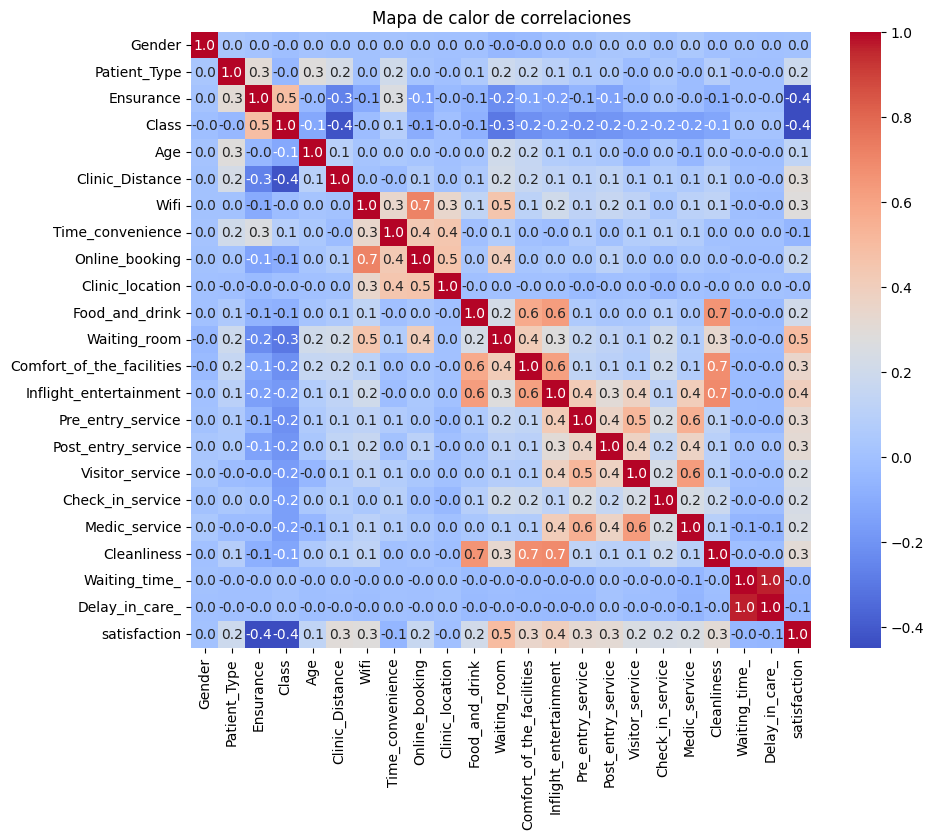

In [15]:
# Calcular la matriz de correlaciones
correlation_matrix = pd.concat([train_X, pd.DataFrame(train_y, columns=["satisfaction"])], axis=1).corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm")

# Personalizar el mapa de calor
plt.title("Mapa de calor de correlaciones")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## **5. Primera modelación y elección de modelo**

In [16]:
models = [RandomForestClassifier(random_state=1)
        , LogisticRegression(max_iter=1000)
        , DecisionTreeClassifier(random_state=1)
        , XGBClassifier()
        ]

cross_val_accuracy = []

for model in models:
    scores = cross_val_score(model, train_X, train_y, cv=5, scoring="accuracy")
    cross_val_accuracy.append(scores.mean())

results = pd.DataFrame(cross_val_accuracy,
                       ['RandomForest', 'Logistic_Regression', 'DecisionTree', 'XGBoost'],
                       columns=['cross_val_accuracy'])

d:\my_projects\Programming_courses\Prueba_tecnica_aba_tech\deployment\deployment-ml-project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\my_projects\Programming_courses\Prueba_tecnica_aba_tech\deployment\deployment-ml-project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer 

In [17]:
results

,cross_val_accuracy
RandomForest,0.961606
Logistic_Regression,0.862314
DecisionTree,0.944595
XGBoost,0.962170


# **6. Feature importance**

In [16]:
#Entrenar clasificador elegido
xgbclassifier = XGBClassifier()
xgbclassifier.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

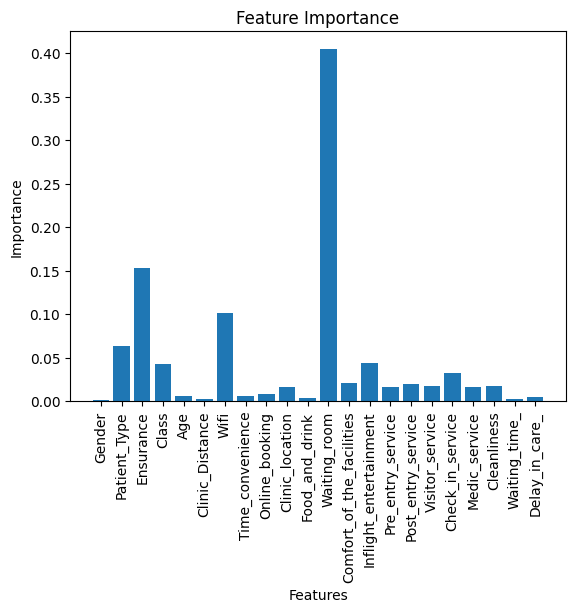

In [17]:
# Obtener la importancia de los features
importance = xgbclassifier.feature_importances_

# Crear una visualización de la importancia de los features
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), train_X.columns, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# **7. Escalado y PCA**

In [18]:
#Realizar un escalamiento a los datos
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
validation_X_scaled = scaler.fit_transform(validation_X)

In [19]:
#Convencional PCA
pca = PCA(n_components=8)
pca.fit(train_X_scaled)

#Apply pca to train and validation datasets
train_X_pca = pca.transform(train_X_scaled)
validation_X_pca = pca.transform(validation_X_scaled)

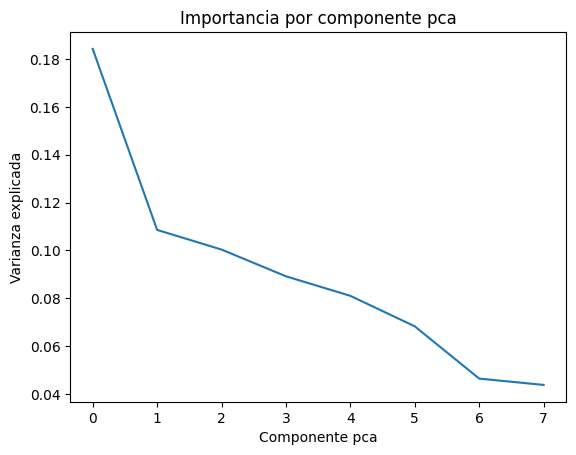

In [20]:
#varianza explicada por cada componente
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Componente pca')
plt.ylabel('Varianza explicada')
plt.title('Importancia por componente pca')
plt.show()

# **8. Optimización de hiperparámetros**
* usaremos la función **GridSearchCV()** la cual aplica *Cross Validations* para encontrar los hiperparámetros óptimos

In [18]:
# Definir el espacio de hiperparámetros a optimizar
param_grid = {'max_depth': [5, 7],'learning_rate': [0.1, 0.01],'n_estimators': [100, 200, 400]}
xgb_model = XGBClassifier()

In [20]:
# Crear un objeto GridSearchCV y configurarlo con el estimador, los hiperparámetros y la métrica de evaluación
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=2)

# Ajustar el modelo utilizando el conjunto de datos de entrenamiento:
grid_search.fit(train_X_pca, train_y)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_ 

In [21]:
# Crea un nuevo modelo XGBoost utilizando los mejores hiperparámetros encontrados
# (El doble asterisco ** se utiliza en Python para desempaquetar un diccionario de argumentos clave-valor. 
best_xgb_model = XGBClassifier(**best_params)

# Ajustar el nuevo modelo utilizando el conjunto de datos de entrenamiento:
best_xgb_model.fit(train_X_pca, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# **9. Resultados del XGBClassifier**

In [22]:
scores = cross_val_score(best_xgb_model, train_X_pca, train_y, cv=5, scoring = "accuracy")
print(f"la precisión del XGBClassifier es: {(scores).mean()}")

la precisión del XGBClassifier es: 0.9193101324299352


### **10. Desempeño XGBClassifier en out of sample data (validation data)**

In [23]:
preds = best_xgb_model.predict(validation_X_pca)
accuracy = accuracy_score(validation_y, preds)
print(f"la precisión del XGBClassifier en OUT OF SAMPLE es: {accuracy}")

la precisión del XGBClassifier en OUT OF SAMPLE es: 0.9221435170927009


## **11. Guardando el modelo en formato .pkl"**

In [32]:
# Se guarda un modelo muy básico, que recibe puros floats, entrenado con los datos básicos luego de imputing y encoding. 
# arroja ints, 0 o 1
model = XGBClassifier()
model.fit(train_X, train_y)
from joblib import dump 
dump(model, "../model/model.pkl")

['../model/model.pkl']

# **Fin de este notebook**